In [73]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns

df= pd.read_csv("E:/Ella/RStudio/DataAnalysis/프로젝트/size.csv" )
df.head()

,ⓞ_02_성별,ⓞ_06_나이_반올림,ⓞ_12_골격근량,ⓞ_13_체지방량,ⓞ_14_체수분,ⓞ_15_단백질,ⓞ_16_무기질,ⓞ_17_BMI,ⓞ_18_체지방율,ⓞ_19_복부지방율,...,①_124_무릎아래둘레,①_125_장딴지둘레,①_126_종아리최소둘레,①_127_발목최대둘레,①_128_발목너비,①_129_발뒤꿈치너비,①_130_위팔둘레,①_131_팔꿈치둘레,①_132_손목둘레,①_133_머리위로뻗은주먹높이
0,남,25,33.2,13.6,42.9,11.8,3.8,23.92,18.9,0.9,...,325.0,370.0,209.0,241.0,50.0,62.0,325.0,286.0,153.0,"2,013"
1,남,28,44.5,28.7,56.5,15.5,5.5,31.61,27.0,0.9,...,396.0,439.0,260.0,295.0,62.0,77.0,395.0,318.0,179.0,"2,160"
2,남,19,36.5,5.6,46.6,12.7,4.2,22.72,8.1,0.8,...,350.0,380.0,232.0,268.0,54.0,63.0,313.0,291.0,166.0,"2,062"
3,남,20,35.2,7.0,45.1,12.3,4.0,22.31,10.3,0.8,...,330.0,368.0,219.0,257.0,58.0,68.0,303.0,295.0,163.0,"2,020"
4,남,22,40.4,11.6,51.5,14.0,4.8,23.90,14.1,0.9,...,362.0,391.0,230.0,279.0,62.0,68.0,304.0,291.0,167.0,"2,148"


In [74]:
df=df.rename(columns = {'ⓞ_02_성별' : 'gender',
                       'ⓞ_06_나이_반올림' :'age',
                       'ⓞ_17_BMI' :'bmi',
                       'ⓞ_20_복부지방율평가' : 'fat',
                      'ⓞ_21_기초대사량' : 'basal',
                       '①_003_키' : 'height',
                       '①_031_몸무게' :'weight',
                       '①_044_배둘레' :'abdo'})
 

In [ ]:
df_size=df[['gender', 'age', 'bmi','fat','basal', 'height','weight','abdo']]

In [81]:
df_size.info()
df_size.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  6420 non-null   object 
 1   age     6420 non-null   int64  
 2   bmi     6412 non-null   float64
 3   fat     6420 non-null   object 
 4   basal   6396 non-null   float64
 5   height  6419 non-null   float64
 6   weight  6413 non-null   float64
 7   abdo    6415 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


,gender,age,bmi,fat,basal,height,weight,abdo
0,남,25,23.92,경도복부비만,1633.0,1736.0,72.1,815.0
1,남,28,31.61,복부비만,2044.0,1833.0,106.2,1053.0
2,남,19,22.72,표준,1742.0,1744.0,69.1,755.0


In [80]:
#컬럼 형식 변경(스트링 -> 숫자)
df_size['basal'] = df_size['basal'].str.strip()
df_size['basal'] = df_size['basal'].str.replace(',','').astype(float)

#df_size['basal'] = df_size['basal'].str.strip().str.replace(',','').astype(float)

df_size['height'] = df_size['height'].str.strip()
df_size['height'] = df_size['height'].str.replace(',','').astype(float)

df_size['abdo'] = df_size['abdo'].str.strip()
df_size['abdo'] = df_size['abdo'].str.replace(',','').astype(float)



AttributeError: Can only use .str accessor with string values!

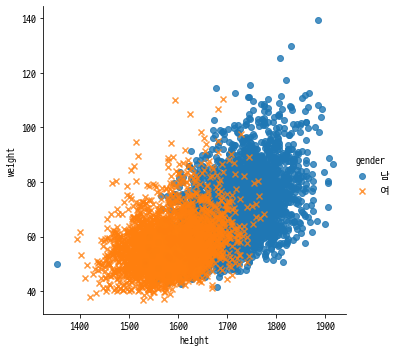

In [82]:
#남여별 키와 몸무게

plt.rc('font', family ='D2Coding')
sns.lmplot(x='height' , y='weight', data= df_size, fit_reg= False, hue_order=['남','여'],
          hue = 'gender', markers=['o','x'])

In [67]:
#남여 평균 키

size_height = df_size.groupby('gender')['height'].mean()
print(size_height)


size_weight = df_size.groupby('gender')['weight'].mean()
print(size_weight)

gender
남    1722.436933
여    1587.105149
Name: height, dtype: float64
gender
남    70.954215
여    56.809745
Name: weight, dtype: float64


In [83]:
df_size['fat'].unique()

array(['경도복부비만', '복부비만', '표준', '0.9'], dtype=object)

In [86]:
df_size.loc[df_size['fat'].isnull()]
df_size['fat'] = df_size['fat'].fillna(value='0.9')
df_size['fat']

0       경도복부비만
1         복부비만
2           표준
3           표준
4           표준
         ...  
6415        표준
6416        표준
6417      복부비만
6418        표준
6419      복부비만
Name: fat, Length: 6420, dtype: object

In [87]:
df_size.loc[df_size['fat']==0.9]

,gender,age,bmi,fat,basal,height,weight,abdo


In [89]:
size3=df_size.loc[df_size['fat']!='0.9']
size3

,gender,age,bmi,fat,basal,height,weight,abdo
0,남,25,23.92,경도복부비만,1633.0,1736.0,72.1,815.0
1,남,28,31.61,복부비만,2044.0,1833.0,106.2,1053.0
2,남,19,22.72,표준,1742.0,1744.0,69.1,755.0
3,남,20,22.31,표준,1695.0,1751.0,68.4,741.0
4,남,22,23.90,표준,1890.0,1851.0,81.9,891.0
...,...,...,...,...,...,...,...,...
6415,여,20,20.48,표준,1259.0,1706.0,59.6,790.0
6416,여,20,20.82,표준,1228.0,1624.0,54.9,795.0
6417,여,44,22.03,복부비만,1120.0,1508.0,50.1,831.0
6418,여,20,18.00,표준,1089.0,1574.0,44.6,722.0


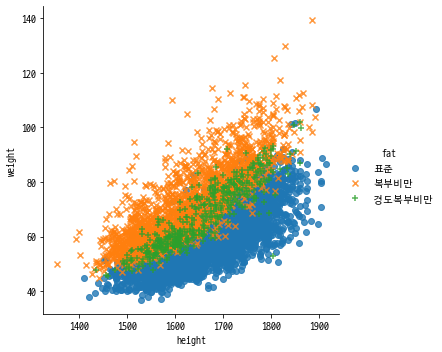

In [60]:
#복부 비만별 키 몸무게
df_size['fat'].unique()
df_size.loc[df_size['fat'].isnull()]
df_size['fat'] = df_size['fat'].fillna(value='0.9')
df_size.loc[df_size['fat']==0.9]

size3=df_size.loc[df_size['fat']!='0.9']

sns.lmplot(x='height', y='weight', data=size3, fit_reg=False,
              hue='fat',
              hue_order=['표준', '복부비만', '경도복부비만'],
              markers=['o','x','+'])